In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import gymnasium as gym
import highway_env

In [2]:
# Inline display trick
import time
import os
from IPython.display import clear_output

In [3]:
import pickle

with open("configs/config2.pkl", "rb") as f:
    config = pickle.load(f)


In [4]:
env = gym.make("highway-fast-v0", render_mode="rgb_array")


In [5]:
env.unwrapped.configure(config)
observation, info = env.reset()
print(info)

{'speed': 25, 'crashed': False, 'action': array([ 0.8193842 , -0.64549845], dtype=float32), 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.3333333333333333, 'high_speed_reward': 0.5, 'on_road_reward': 1.0}}


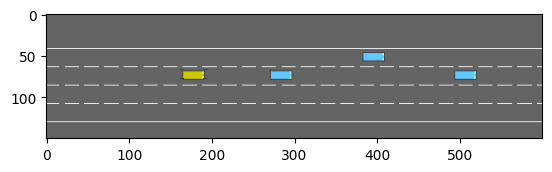

In [6]:
plt.imshow(env.render())
plt.show()

In [7]:
print([ m for m in dir(env) if not m.startswith('_')]) # take a look at the available methods of object env
print('\n')
print(env.action_space)
print(env.observation_space)

['action_space', 'class_name', 'close', 'env', 'get_wrapper_attr', 'has_reset', 'has_wrapper_attr', 'metadata', 'np_random', 'np_random_seed', 'observation_space', 'render', 'render_mode', 'reset', 'set_wrapper_attr', 'spec', 'step', 'unwrapped', 'wrapper_spec']


Box(-1.0, 1.0, (2,), float32)
Box(-inf, inf, (7, 8, 8), float32)


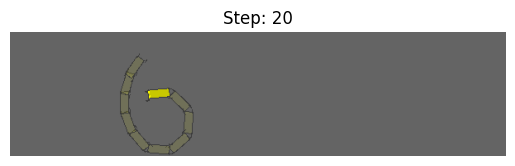

In [9]:
env.reset()

for step in range(20):
    action = env.action_space.sample()  # Sample a random action
    observation, reward, done, truncated, info = env.step(action)  # Adjusted to include 'truncated'
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.title(f"Step: {step + 1}")
    plt.axis('off')
    plt.show()
    time.sleep(0.1)  # Pause for a moment to see the image
    if done or truncated:  # Check both done and truncated
        print("Episode ended after this step. Resetting environment.")
        env.reset()
